In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

from basic_classification_processing import basic_stats_processing

In [2]:
filename = 'calibrating-strong-lenses-classifications.csv'
#data = pd.read_csv('data/'+filename)
outfile = 'data/' + 'output_cleaned.csv'

# since we've already printed the stats to the screen above, don't re-print them
basic_stats_processing('data/'+filename, workflow_id=26723, workflow_ver_min=9.31,
                       remove_duplicates=True, outfile_csv=outfile, keep_nonlive=False,
                       keep_allcols=True, verbose=False)

data = pd.read_csv(outfile)

Reading classifications from data/calibrating-strong-lenses-classifications.csv
File with used subset of classification info written to data/output_cleaned.csv .


In [3]:
for i in range(len(data)):
    print(data.iloc[i])
    print(data['annotations'].iloc[i])
    print(data['subject_data'].iloc[i])
    print(data['subject_ids'].iloc[i])

Unnamed: 0                                                          79
classification_id                                            566639756
user_name                                                     Krojas26
user_id                                                      2401438.0
user_ip                                           b0f629dc49f75d26a9f5
workflow_id                                                      26723
workflow_name                                            Basic scoring
workflow_version                                                  9.31
created_at                                     2024-06-10 08:13:47 UTC
gold_standard                                                      NaN
expert                                                             NaN
metadata             {"source":"api","session":"b260497f56bca2763d8...
annotations          [{"task":"T0","task_label":"Please select the ...
subject_data         {"99855497":{"retired":null,"#CLASS":"single_c...
subjec

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Unnamed: 0                                                        3902
classification_id                                            569577695
user_name                                                alejandramelo
user_id                                                       862243.0
user_ip                                           4300e1aab877905afd47
workflow_id                                                      26723
workflow_name                                            Basic scoring
workflow_version                                                  9.31
created_at                                     2024-06-26 09:25:32 UTC
gold_standard                                                      NaN
expert                                                             NaN
metadata             {"source":"api","session":"930d0d0904c8ef940ed...
annotations          [{"task":"T0","task_label":"Please select the ...
subject_data         {"99854264":{"retired":null,"#CLASS":"single_c...
subjec

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
unique_user_names = data['user_name'].unique()
print(unique_user_names)

['Krojas26' 'anasainzdm' 'sgonzalezloz' 'SkyLi'
 'not-logged-in-fa29dd44a73bcf949352' 'not-logged-in-c54a7f4be997c3cea963'
 'carlos.melo' 'not-logged-in-4f016142d81f33678e8b'
 'not-logged-in-43af43b0f5dc77ec8eee' 'not-logged-in-c79cd3119133f7ce4fd0'
 'not-logged-in-678169d9eb3377856b5c' 'not-logged-in-fa71a3de4698b7e08bbc'
 'not-logged-in-42d66f776e7eb58245e2' 'not-logged-in-309035c61e114b690f1c'
 'not-logged-in-7b6b4a6831ecc60b4c97' 'not-logged-in-3a206ff5f310ca8f50af'
 'not-logged-in-ed7cb569166f80254cad' 'not-logged-in-758fa12e027757e1c888'
 'not-logged-in-9777b56959734c9e4c39' 'not-logged-in-755810cfb62c5035f54b'
 'not-logged-in-cb866af49974183d08b9' 'curiosorus' 'ctortora'
 'clarkguilty' 'anupreeta' 'alejandramelo'
 'not-logged-in-8615c6c6967680b0e45a' 'not-logged-in-58d5fec8901fbced307e'
 'not-logged-in-5fa5126a195f6679642f' 'not-logged-in-a8f6b33b67913afa2ae8'
 'not-logged-in-dd894a54a7031c8db4d2' 'not-logged-in-4d26027f347991bce90e'
 'not-logged-in-306c2b9c76ebedc096b6' 'not-lo

In [5]:
# Saving file with subject ids & my 'new id'
subject_ids_list, new_id_list = [], []
for i in range(len(data)):
    if data['subject_ids'].iloc[i] not in subject_ids_list:
        subject_ids_list.append(data['subject_ids'].iloc[i])
        line_tmp = json.loads(data['subject_data'].iloc[i])
        line_tmp = line_tmp[str(data['subject_ids'].iloc[i])]
        new_id_list.append(line_tmp['#NEW_ID'])

In [6]:
#username_list = ['Krojas26', 'anasainzdm', 'sgonzalezloz', 'SkyLi', 'carlos.melo']
username_list = ['Krojas26', 'sgonzalezloz', 'curiosorus', 'ctortora', 'clarkguilty', 'anupreeta', 'alejandramelo']

#Adding each person as a new column
new_data = pd.DataFrame(columns = username_list)
new_data['SUBJECT_ID'] = subject_ids_list
new_data['new_id'] = new_id_list 
score_conv = {'A': 3, 'B': 2, 'C': 1, 'Z': 0}

for i in range(len(data)):
    if(data['user_name'].iloc[i] in username_list):
        row_new_data = new_data[new_data['SUBJECT_ID'] == data['subject_ids'].iloc[i]]
        line_tmp = json.loads(data['annotations'].iloc[i])[0]['value']
        score = score_conv[line_tmp[0]]
        new_data.iloc[row_new_data.index, new_data.columns.get_loc(data['user_name'].iloc[i])] = score

In [7]:
new_data['average'] = new_data[username_list].mean(axis=1)
new_data = new_data.dropna(subset=['curiosorus'])

path_mani = '/Users/jimenagonzalez/research/DSPL/Citizen_science_project/Intersection/data/For_zooniverse/'
complete_manifest = pd.read_csv(path_mani + 'complete_manifest.csv')

#mask = new_data['#NEW_ID'].isin(complete_manifest['#NEW_ID'])
#new_data = new_data[mask]
#print(len(new_data))

for user in username_list:
    nan_count = new_data[user].isna().sum()
    print(user, nan_count)

#complete_manifest
new_data

Krojas26 0
sgonzalezloz 0
curiosorus 0
ctortora 0
clarkguilty 0
anupreeta 1311
alejandramelo 0


,Krojas26,sgonzalezloz,curiosorus,ctortora,clarkguilty,anupreeta,alejandramelo,SUBJECT_ID,new_id,average
100,0,1,0,0,0,NaN,0,99854754,1021,0.166667
101,0,0,0,0,0,NaN,0,99854024,291,0.000000
102,2,1,0,1,0,NaN,0,99855227,1494,0.666667
103,2,2,0,2,0,NaN,1,99853993,260,1.166667
104,0,0,0,0,0,NaN,0,99855025,1292,0.000000
...,...,...,...,...,...,...,...,...,...,...
1746,0,1,0,1,1,NaN,0,99854508,775,0.500000
1747,0,0,0,0,0,NaN,0,99854602,869,0.000000
1748,2,2,0,1,1,NaN,0,99854266,533,1.000000
1749,2,1,0,1,0,NaN,1,99854207,474,0.833333


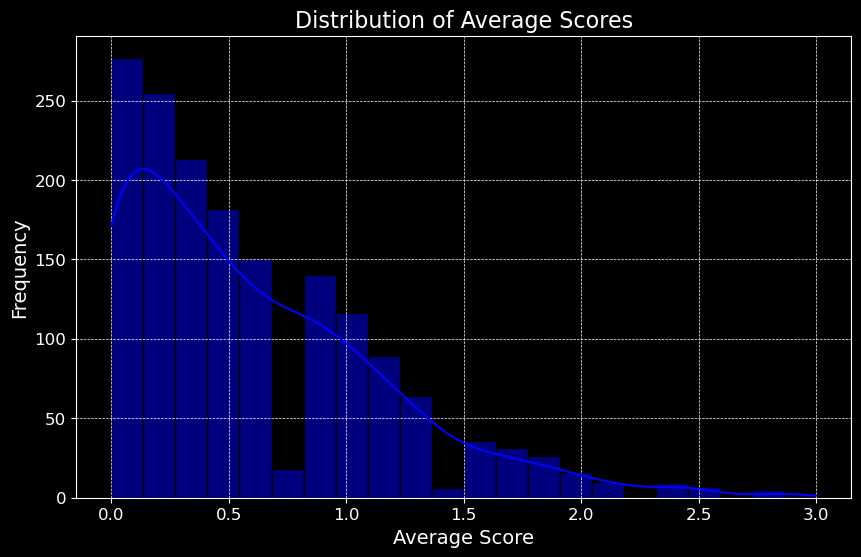

In [8]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.histplot(new_data['average'], bins='auto', kde=True, ax=ax, color='blue', edgecolor='black')

# Customize the plot
ax.set_title('Distribution of Average Scores', fontsize=16)
ax.set_xlabel('Average Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5)

# Save the plot
#plt.savefig('average_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [9]:
#Plotting the ones with very low scores or very high scores:

In [10]:
#For 3D plot:

path = '/Users/jimenagonzalez/research/DSPL/Citizen_science_project/Intersection/data/For_zooniverse/'
complete_manifest = pd.read_csv(path + 'complete_manifest.csv')

new_data = new_data.rename(columns={'new_id': '#NEW_ID'})
new_data['#NEW_ID'] = new_data['#NEW_ID'].astype(complete_manifest['#NEW_ID'].dtype)

complete_manifest = complete_manifest.merge(new_data, on='#NEW_ID', how='left')
print(complete_manifest.columns)
complete_manifest

Index(['COADD_OBJECT_ID', 'K_RA', 'K_DEC', 'K_SCORE', 'Y3_COADD_OBJECT_ID',
       'J_RA', 'J_DEC', 'score_sims', 'score_real', 'score_both', 'G_RA',
       'G_DEC', 'SINGLE', 'RING', 'SMOOTH', 'COMPANIONS', 'SDSS_SPIRALS',
       'DES_SPIRALS', 'CROWDED', 'ARTIFACTS', 'MOST_NEGATIVES', 'index', 'ra',
       'dec', 'name', 'score', 'image_sep', 'info', 'n_img', 'flag',
       'image_conf', 'lens_type', 'source_type', 'contaminant_type', 'papers',
       '#subject_id', '#NEW_ID', '#image_name_1', '#image_name_2',
       '#image_name_3', '#image_name_4', '!Subject Type', 'Colours',
       'Size-in-arcsec', '#CLASS', 'Krojas26', 'sgonzalezloz', 'curiosorus',
       'ctortora', 'clarkguilty', 'anupreeta', 'alejandramelo', 'SUBJECT_ID',
       'average'],
      dtype='object')


,COADD_OBJECT_ID,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,...,#CLASS,Krojas26,sgonzalezloz,curiosorus,ctortora,clarkguilty,anupreeta,alejandramelo,SUBJECT_ID,average
0,1538255919,78.309585,-52.505695,0.944468,413391817.0,78.309585,-52.505695,0.0000,0.0,0.0,...,single_cand,3,3,2,2,2,NaN,1,99853734,2.166667
1,1537731200,77.456831,-52.455477,0.411994,413390304.0,77.456831,-52.455477,0.0000,0.0,0.0,...,single_cand,2,2,0,1,0,2,1,99853733,1.142857
2,1510424134,72.587800,-50.743626,0.000009,483404421.0,72.587800,-50.743626,0.0000,0.0,0.0,...,single_cand,2,1,0,0,0,NaN,0,99853735,0.500000
3,1044445712,2.526065,3.911200,0.000008,178846367.0,2.526065,3.911200,0.1880,0.0,0.0,...,single_cand,2,0,0,1,0,NaN,0,99853736,0.500000
4,1478069288,66.905377,-22.080270,0.996424,498287987.0,66.905377,-22.080270,0.9188,0.0,0.0,...,single_cand,2,2,0,1,1,1,0,99853737,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1014987031,353.841306,-42.152248,0.019415,135541970.0,353.841306,-42.152248,0.4123,0.0,0.0,...,single_cand,2,1,0,1,0,NaN,0,99855379,0.666667
1647,1172236686,21.434334,-21.050730,0.111924,221677466.0,21.434334,-21.050730,0.0678,0.0,0.0,...,single_cand,2,1,0,1,2,NaN,0,99855380,1.000000
1648,969989970,339.397353,0.670782,0.998712,94796985.0,339.397353,0.670782,0.0757,0.0,0.0,...,single_cand,1,0,0,0,0,0,0,99855381,0.142857
1649,1607380123,95.167944,-43.091104,0.024310,465145849.0,95.167944,-43.091104,0.0275,0.0,0.0,...,single_cand,0,2,0,0,0,NaN,0,99855382,0.333333


In [13]:
cand_sled = complete_manifest

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib widget

# Calculate the size for the points
size = (cand_sled['average'] + [0.7]*len(cand_sled))**5.5

# Create a figure
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(cand_sled['SINGLE'], cand_sled['K_SCORE'], cand_sled['score_sims'], 
                s=size.values, edgecolors='#00008B', facecolors='none', linewidth=1.)

# Set labels
ax.set_xlabel('Jimena')
ax.set_ylabel('Karina')
ax.set_zlabel('Jacobs')
ax.set_title('3D Scatter plot of beta test')

# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
print(len(cand_sled))
cand_sled.to_csv('data/complete_data.csv', index=False)

1651
